In [2]:
#importing the libraries that I will use for this project
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
df  = pd.read_csv("C:\\Users\\Gacheru\\Documents\\Pyscripts DS\\Tip-prediction\\tips.csv")
#dropping the coloumns I am not interested in

mydata = df.drop(['size','Payer Name','CC Number','Payment ID'],axis=1)

In [4]:
#reaarranging the data
mydata = mydata[['tip','total_bill','sex','smoker','day','price_per_person']]

In [5]:
mydata

,tip,total_bill,sex,smoker,day,price_per_person
0,1.01,16.99,Female,No,Sun,8.49
1,1.66,10.34,Male,No,Sun,3.45
2,3.50,21.01,Male,No,Sun,7.00
3,3.31,23.68,Male,No,Sun,11.84
4,3.61,24.59,Female,No,Sun,6.15
...,...,...,...,...,...,...
239,5.92,29.03,Male,No,Sat,9.68
240,2.00,27.18,Female,Yes,Sat,13.59
241,2.00,22.67,Male,Yes,Sat,11.34
242,1.75,17.82,Male,No,Sat,8.91


,total_bill,tip
total_bill,79.252939,8.323502
tip,8.323502,1.914455


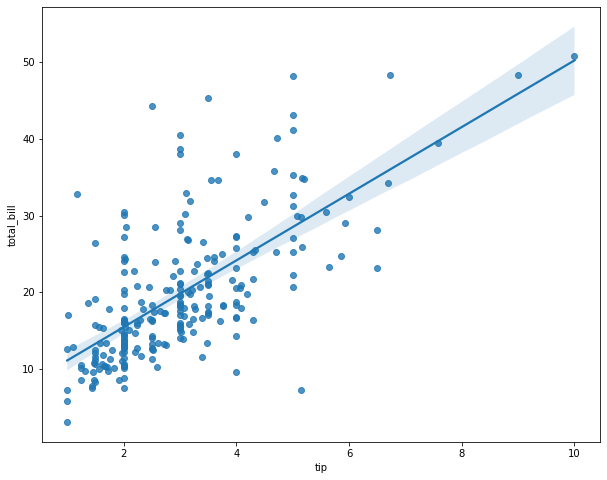

In [6]:
#we can start the vizualization aspect of the data
# let us check the correlation of tip and total_bill using a scatter plot
#The regplot() function of the Seaborn library is definitely the best way to build a scatterplot in minutes.
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(x=mydata["tip"], y=mydata["total_bill"])

#cheking the correlation between the total bill and tips
mydata['total_bill'].corr(mydata['tip'])

#there is a positive correlation between the total bill and tips, and since it measure both direction and magnitude
#we find that there exists a strong correlation between the data
# let us look at the covariance of the data - 
mydata[['total_bill','tip']].cov()


In [7]:
#covariance of the data is positive and high meaning that the data is moving in the same direction as cov measures direction
mydata.total_bill.cov(mydata.tip)

8.323501629224854

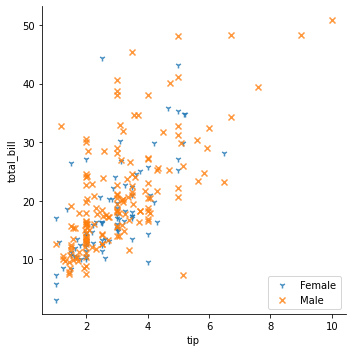

In [8]:
# Use the 'hue' argument to provide a factor variable - sex

sns.lmplot( x="tip", y="total_bill", data=mydata, fit_reg=False, hue='sex', legend=False,markers=["1", "x"])
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')


plt.show()

<AxesSubplot:xlabel='day', ylabel='total_bill'>

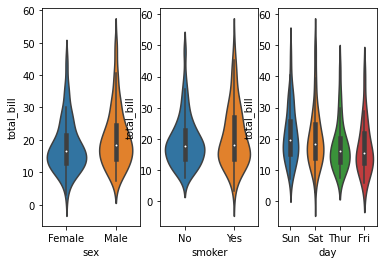

In [13]:
#we can look at a distribution chartv for the sexes, smokers, day and time
#violin of the total bill and the distribution among sex, days and whether smoker or not
#define plotting region (1 row, 2 columns)
fig, axes = plt.subplots(1, 3)

#violin plot 
sns.violinplot(x=mydata["sex"], y=mydata["total_bill"],ax=axes[0])
sns.violinplot(x=mydata["smoker"], y=mydata["total_bill"],ax=axes[1])
sns.violinplot(x=mydata["day"], y=mydata["total_bill"],ax=axes[2])